&nbsp;

# Création du masque des côtes

---

&nbsp;

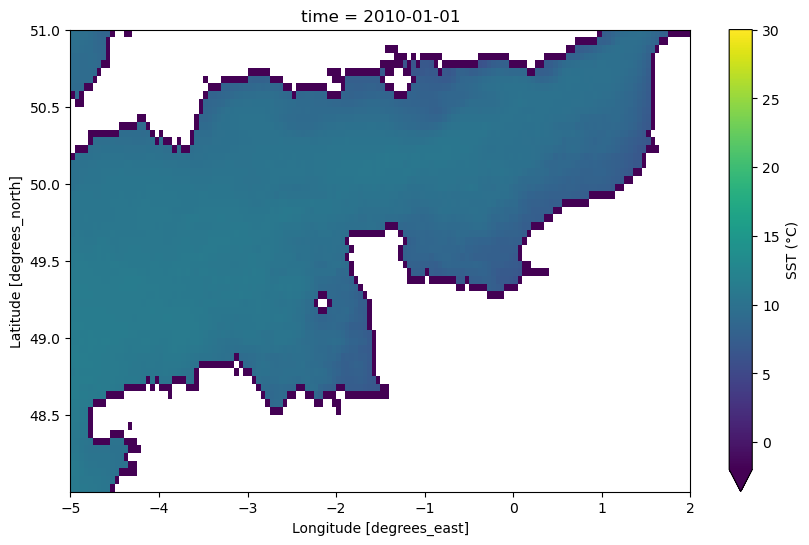

In [7]:
import numpy as np
import xarray as xr
from scipy.ndimage import binary_dilation

ds = xr.open_dataset('data/processed/sstCOPERNICUS20102019Processed.nc')

sst0 = ds['analysed_sst'].isel(time=0)

ocean = ~np.isnan(sst0.values)

# dilate la terre vers la mer
land = ~ocean
land_dilated = binary_dilation(land)

coast_mask = ocean & land_dilated

dsCoastLine = sst0.copy(deep=True)
dsCoastLine.values[coast_mask] = -9999.0

dsCoastLine.plot(
    figsize=(10, 6),
    cmap='viridis',
    vmin=-2,
    vmax=30,
    cbar_kwargs={'label': 'SST (°C)'}
)





